In [1]:
using Symbolics, Interact, Plots, Printf, FiniteDifferences, ForwardDiff

WebIO._IJuliaInit()


(process:12692): GLib-GIO-WARNING **: 02:10:58.981: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.2.12.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs


# Numerical Derivatives
- The derivative $f'(x)$ of a function $f(x)$ of a single variable x is the rate at which the value of $f(x)$ changes at x. Graphically, it is the slope of the tangent line of $f(x)$ at a given value of $x$.


### application
- "How could we use information of the slope to find the $x$ that maximizes the function (i.e., the optimal $x$)?
1. direction
    - If the slope at the current point $x=x0$ is positive, the optimal $x$ should be larger than $x0$.
    - It means we need to make a positive step to move to the optimal. It tells use the direction of _steepest ascent_.
2. step length
    - If the size of the slope (i.e., $|slope|$) at the current point $x=x0$ is large (steep), then, generally speaking, the point is far away from the optimal point."


### First Derivatives

- Consider a continuous function $f(x)$ which is (twice) differentiable, and the limit equation defining the derivative is:

\begin{equation}
 f'(x_0) = \frac{df}{dx} \vert_{x=x0} = \lim_{h \rightarrow 0} \frac{f(x_0+h) - f(x_0)}{h}.
\end{equation}

    - The notation implies that, in theory, $h$ should be as small as possible. 

- Consider the 1st derivative of the following function:

\begin{equation}
 f(x) = -\frac{1}{2}x^2 + 20,
\end{equation}

- for which the derivative is

\begin{equation}
 f'(x) = -x.
\end{equation}

- Let's consider the case $f'(x=-4)$.


In [ ]:
@variables x
f(x) = -(1/2)x^2 + 20
Symbolics.derivative(f(x), x)

In [ ]:
f(x) = -(1/2)x^2 + 20
# construct the secant line in the beginning and when h->0 we will get the tangent line
function sec(x, h, x0)
    base =  f(x0)
    slope = (f(x0+h)-f(x0))/h
    return base + slope*(x-x0)
end

x0 = -4.0

@manipulate for h = 1e-9:0.1:9 
    f_sec(x::Float64) = sec(x, h, x0) # hjw
    
    plot(size=(600,400))
    plot!(f, xlims=[-12,12], ylims = [8,25] , aspect_ratio = 1, label="f(x)", linewidth=2) # main curve
    plot!(f_sec, label="secant line")  
    
    scatter!([x0], [f(x0)], label=false)      # intersection a
    annotate!(x0-1, f(x0), text("($x0,$(f(x0)))", :orange, :right, 9))
    
    scatter!([x0+h], [f(x0+h)], label=false)  # intersection b
    annotate!(x0+h+1, f(x0+h), text("$(round.((x0+h,f(x0+h)), digits=4))", :purple, :left, 9))  # deal with round
    
    plot!([x0,x0+h], [f(x0)<f(x0+h) ? f(x0) : f(x0+h), f(x0)<f(x0+h) ? f(x0) : f(x0+h)], ls=:dash, color=:darkred, label=false)
    quiver!([x0+h/2], [f(x0)<f(x0+h) ? f(x0)-3 : f(x0+h)-3], quiver=([0],[3]), color=:darkred)
    annotate!([x0+h/2], [f(x0)<f(x0+h) ? f(x0)-3.5 : f(x0+h)-3.5], text("h=$(round(h, digits=4))", 9))
    
    plot!([f(x0)<f(x0+h) ? x0+h : x0, f(x0)<f(x0+h) ? x0+h : x0], [f(x0),f(x0+h)], ls=:dash, color=:darkred, label=false)
    quiver!([f(x0)<f(x0+h) ? x0+h+3 : x0-3], [(f(x0)+f(x0+h))/2-2], quiver=([f(x0)<f(x0+h) ? -3 : 3],[2]), color=:darkred)
    annotate!([f(x0)<f(x0+h) ? x0+h+3 : x0-3], [(f(x0)+f(x0+h))/2-2.5], text("f(x+h)-f(x) = $(round(f(x0+h)-f(x0), digits=4)) ",9))
    
  
    quiver!([x0+h+1-3], [f_sec(x0+h+1)+2], quiver=([3],[-2])   )
    # note the rounding
    annotate!(x0+h+1-3, f_sec(x0+h+1)+2.5, text("slope=$( round((f(x0+h)-f(x0))/h, digits=6) )", :red, 9)) 
end

- It seems the result is accurate: When the $h$ is small, we get the correct value of the slope which is 4
- However, the result looks good only because we have rounded the numbers
    - That is, the value of the slope, if you look closely enough, is not exactly 4
- We now study the numerical issues of the approximation.

### The numerical approximation using finite differences

- The limit equation may be straightforwardly implemented using the _**forward difference**_ formula to which the error term is $O(h)$:

\begin{equation}
 f'(x_0) \approx \frac{f(x_0+h) - f(x_0)}{h}\quad \mbox{ for a small $h$}.\label{eq:approx1}
\end{equation}

- Compared to the (theoretical) limit equation, the numerical implementation has some important differences.

- The forward difference formula is not the most accurate formula to approximate the derivatives.

- For the numerical approximation, it is not always true that the ever-smaller $h$ is better. In fact, choosing the appropriate size of $h$ is very important for numerical derivatives.
    - the issue is related to the machine precision

In [6]:
# let's see the machine precision of the data type: float64
sqrt(eps(one(eltype(1.0))))  # square-root of machine precision

1.4901161193847656e-8

In [10]:
# Let's see how the choice of h may affect the results.
x0 = 10
f(x) = exp(x)
f_d1_true(x) = f(x)
f_d1_forward(x,h) = @. (f(x+h)-f(x)) / h  # numerical derivative 
f_d1_forward_error(x,h) = f_d1_forward(x,h) .- f_d1_true(x)    # approximation error



ϵ = sqrt(eps(one(eltype(1.0))))  # square-root of machine precision

h_list = [1e-4, 1e-5, 1e-6, 1e-7, ϵ, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]

function test1(x, hList)
    res = zeros(length(hList),3)
    res[:,1] = hList
    res[:,2] = f_d1_forward(x, hList)
    res[:,3] = f_d1_forward_error(x, hList)
    return res   
end   

Base.show(io::IO, f::Float64) = @printf(io, "%3.16f", f) # show more digits

test1(x0, h_list) 

12×3 Matrix{Float64}:
 0.0001000000000000  22027.5671547278761864     1.1013599211582914
 0.0000100000000000  22026.5759264293592423     0.1101316226413473
 0.0000010000000000  22026.4767885964829475     0.0109937897650525
 0.0000001000000000  22026.4667586889117956     0.0009638821939006
 0.0000000149011612  22026.4658203125000000     0.0000255057821050
 0.0000000100000000  22026.4675590442493558     0.0017642375314608
 0.0000000010000000  22026.4664676506072283     0.0006728438893333
 0.0000000001000000  22026.4701056294143200     0.0043108226964250
 0.0000000000100000  22024.3236981332302094    -2.1420966734876856
 0.0000000000010000  22027.9616769403219223     1.4958821336040273
 0.0000000000001000  21900.6324186921119690  -125.8333761146059260
 0.0000000000000100  23283.0643653869628906  1256.5985705802449957

- We saw several things from the naive example above.

1. $h$ should not be too small or too large.

2. Using naive methods, the best $h$ may change if we change the value in the $\exp(.)$ function. 

  - For $\exp(2)$, $h=$1e-8 seems better.

  - For $\exp(10)$, $h=$1e-7 seems better.

3. The accuracy improves if we use half of the machine precision, `sqrt(eps(one(eltype(1.0)))) = 1.4901161193847656e-8`, as the `h`.


4. In the best scenario of numerical approximations (e.g., Julia's `FiniteDifferences` package), the numerical approximation is only about half as accurate, in the sense that, for the `Float64` data type, only the first 8 digits out of the total 16 digits are accurate. If use `Float32` data type, only the first 4 digits would be accurate.

> `Float32` stores 8 decimal digits and `Float64` stores 16 decimal digits.

5. The loss in accuracy occurs because of rounding errors that mainly take place in the calculation of $\exp(x+h) - \exp(h)$.

- The first point is surprising, because in math $h$ should be infinitely small
- The discrepancy arises because numbers in computers have finite precisions which lead to rounding errors
- The lesson here is that knowing the math is one thing, understanding how to implement it in computer languages is quite another thing which is also of great importance.

- To get the best $h$, it may be desirable to adjust the value dynamically 
    - Nash (1990) suggested choosing $h$ so that **$x+h$ should differ from $x$ in at least half of its digits**. He proposed the following formula:
\begin{equation}
  h(x) = \epsilon\times (|x| + \epsilon),
\end{equation}
- where $\epsilon$ is the square root of machine precision
    - The machine precision is roughly 2e-16 for `Float64`
    - in Julia the machine precision is `e=eps(one(eltype(1.0)))=2.220446049250313e-16`
    - so square root of the machine precision is `e_root=sqrt(eps(one(eltype(1.0))))=1.4901161193847656e-8`
- So, for taking derivatives on $\exp(2)$, the suggested $h$ is $h(2) =  e\_root \times (2 + e\_root)$
- For $\exp(10)$, the suggested $h$ is $h(10) =  e\_root \times (10 + e\_root)$
> Note that this is a general rule which may not be the best rule for all the equations of all the values.


- In addition to choosing a better $h$, the equation based on which the difference is calculated would also matter. In this regard, the _**central difference**_ formula has better precision (compared to the forward difference formula in \eqref{eq:der1}). Its error term is $O(h^2)$:

\begin{equation}
 f'(x_0) \approx \frac{f(x_0+h/2) - f(x_0 - h/2)}{h}\quad \mbox{ for a small $h$}.\label{eq:der1}
\end{equation}


- There are many computer softwares that do numerical optimizations (which rely heavily on numerical details) 
- The _mathematical_ optimization algorithms are common knowledge, but you'll find that some softwares do a better job than others in using the algorithms to solve optimization problems
    - more robust, stable, and accurate. The secret is often in the numerical details
    - That is, given the same mathematical algorithms, how well does the software translates it into computer algorithms by taking care of the numerical details. In the current example, the secret is in choosing a suitable value of $h$.

#### homework: (1) Chagne f(x) to 3x^2 + log(x^2). Does Nash's rule still good? (2) Implement the centered formula, and re-examine the accuracy issue again. (3) Draw a graph with error on the vertical and h on the horizontal axis.

6×3 Matrix{Float64}:
 0.0000010000000000  60.2000029630289646  0.0000029630289617
 0.0000001000000000  60.2000000071711838  0.0000000071711810
 0.0000001490116122  60.2000006732344630  0.0000006732344602
 0.0000000149011612  60.2000007629394531  0.0000007629394503
 0.0000000100000000  60.2000056915130699  0.0000056915130671
 0.0000000010000000  60.2000227445387210  0.0000227445387182

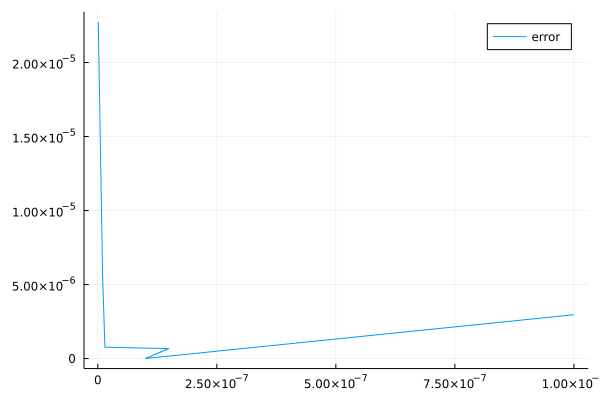

In [39]:
f(x) = 3x^2 + log(x^2) 
f_d1_true(x) = 6x + 2/x
f_d1_num(x,h) = @. (f(x+h)-f(x)) / h  # numerical derivative 
f_d1_num_error(x,h) = f_d1_num(x,h) .- f_d1_true(x)    # approximation error

function test1(hList; x0)
    res = zeros(length(hList),3)
    res[:,1] = hList
    res[:,2] = f_d1_forward(x0, hList)
    res[:,3] = f_d1_forward_error(x0, hList)
    return res   
end   

ϵ = sqrt(eps(one(eltype(1.0))))  # square-root of machine precision
nashH(x0) =  ϵ * (abs(x0)+ϵ) 

x0 = 10
nash_h = nashH(x0)
h_list = [1e-6, 1e-7, nash_h, ϵ, 1e-8, 1e-9]

Base.show(io::IO, f::Float64) = @printf(io, "%3.16f", f) # show more digits
test1(x0, h_list) |> display
plot(h_list, f_d1_num_error(x0,h_list), label="error")


### use the julia packages to computer the derivative
- finite difference: FiniteDifferences.jl
- forward mode automatic differentiation: ForwardDiff.jl

In [28]:
x0 = 10
f(x) = exp(x)

# the function is using central finite difference method(5th order first derivative)
julia_finite_error = central_fdm(5, 1)(f, x0) - f_d1_true(x0)  # numerical derivatives
@show julia_finite_error

# the method is the mixture of symbolic and numeric
julia_AD_error = ForwardDiff.derivative(f, x0) - f_d1_true(x0)  # automatic differentiation
@show julia_AD_error

julia_finite_error = 0.0000000059153535
julia_AD_error = 0.0000000000000000


0.0000000000000000

### Second Derivatives

The second derivative captures the curvature of the function. An easy way to think of the calculation of the second derivative is that we take derivatives on the first derivative. Thus,

\begin{equation}
f''(x) \approx \frac{f'(x + h/2) - f'(x - h/2)}{h}. \label{eq:der2a}
\end{equation}

Substituting the approximation function of $f'(x)$ in \eqref{eq:der1} into the above equation, we have

\begin{equation}
f''(x) \approx \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}. \label{eq:der2b}
\end{equation}

Note that if $f'(x)$ is calculated to half accuracy, $f''(x)$ would be also calculated to half accuracy. That is, there is no further loss of accuracy.





### Gradient and Hessian: Derivatives in Multiple Dimensions

The gradient is the generalization of the derivative to multivariate functions. It captures the local slope of the function, allowing us to predict the effect of taking a small step from a point in any direction. Similar to the derivative in the case of a uni-variate variable, the gradient of a multivariate function tells us the direction of steepest ascent of the tangent hyperplane on the function.

Suppose $f(\mathbf X)$ is a multivariate function where $\mathbf{X}= (X_1, X_2, \ldots, X_n)$ is a vector of variables. The gradient of $f(\mathbf X)$ at $\mathbf x$ is written as $\nabla f(\mathbf x)$ and is a vector:

\begin{equation}
 \nabla f(\mathbf x) = \left[\frac{\partial f(\mathbf x)}{\partial x_1}, \frac{\partial f(\mathbf x)}{\partial x_2}, \ldots, \frac{\partial f(\mathbf x)}{\partial x_n} \right]. 
\end{equation}

Each of the components is a partial derivative with respect to a variable in the $\mathbf X$ vector. Following Julia's notation, we treat $\nabla f(\mathbf x)$ as a column vector.

The _Hessian_ of a multivariate function is a $n \times n$ matrix containing all of the second derivatives with respective to the variables in $\mathbf X$.

\begin{equation}
\nabla^2 f(\mathbf x) = 
\begin{bmatrix}
\frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_1} & \frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_n} \\
 & \vdots &  &  \\
\frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_1} & \frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_n} 
\end{bmatrix}.
\end{equation}

### Here are some rules of differentiations.


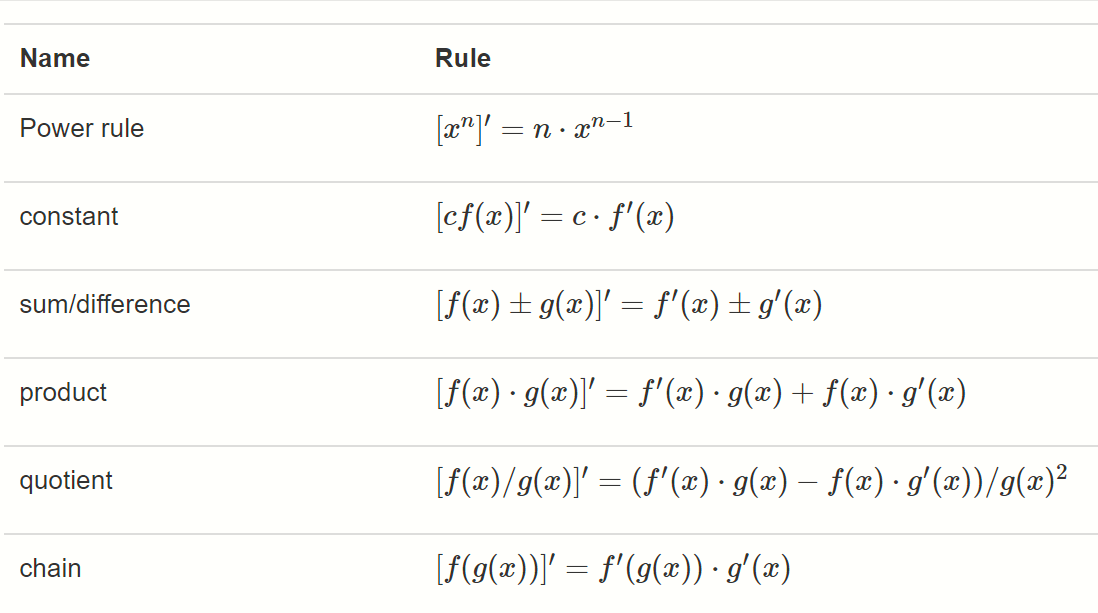

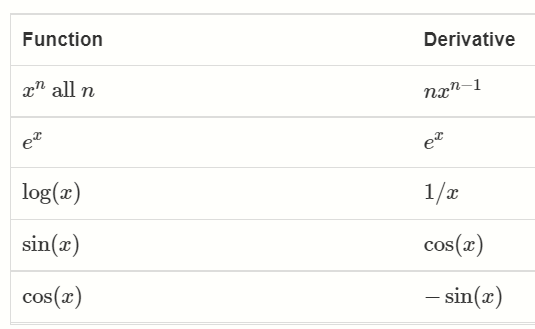